# Practical 5: Antarctic flow speed, thickness and surface elevation

In [19]:
!pip install ipympl

  Using cached ipympl-0.9.3-py2.py3-none-any.whl (511 kB)


In [2]:
import scipy.io

import numpy as np
import matplotlib.pyplot as plt

s = scipy.io.loadmat("/Users/jkingslake/Documents/teaching/Glaciology/2019/P4/MeasuredSpeed.mat")
b = scipy.io.loadmat("/Users/jkingslake/Documents/teaching/Glaciology/2019/P4/BedMap2_forP4.mat")

Vx = s['Vx']
Vy = s['Vy']
x = s['x']
x = np.squeeze(x)

y = s['y']
y = np.squeeze(y)

elev_bed = b['elev_bed']
elev_surf = b['elev_surf']
slope = b['slope']
thickness = b['thickness']
x_bedmap = b['x_bedmap'][0,:]
y_bedmap = b['y_bedmap'][:,0]

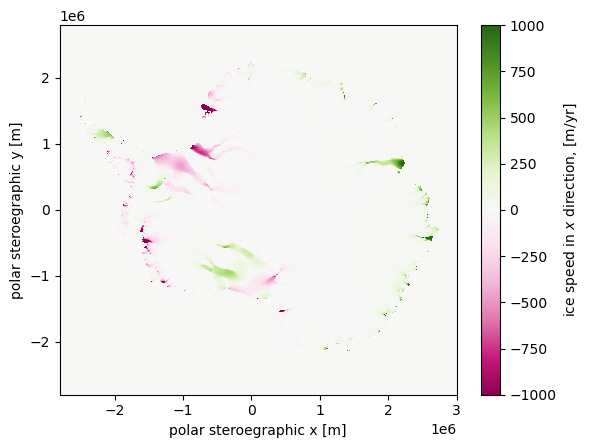

In [146]:
plt.figure()
plt.pcolormesh(x, y, Vx, clim = (-1000, 1000), cmap = 'PiYG');
plt.xlabel('polar steroegraphic x [m]')
plt.ylabel('polar steroegraphic y [m]');
plt.colorbar(label = 'ice speed in $x$ direction, [m/yr]')
plt.show()

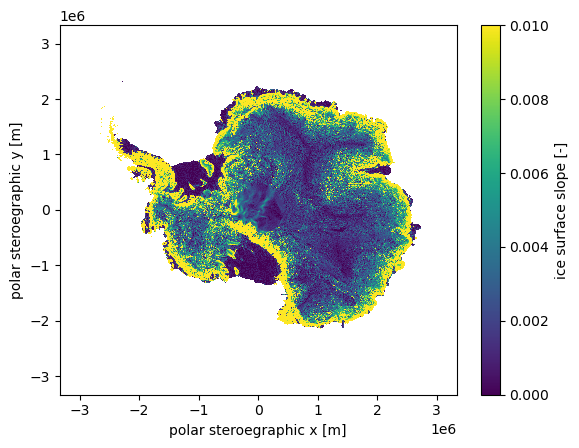

In [153]:
plt.figure()
plt.pcolormesh(x_bedmap, y_bedmap, slope, clim = (0,0.01));
plt.xlabel('polar steroegraphic x [m]')
plt.ylabel('polar steroegraphic y [m]');
plt.colorbar(label = 'ice surface slope [-]')
plt.show()

In [152]:
np.nanmax(slope)


0.7959429941899105

In [154]:
import matplotlib
matplotlib.use( 'tkagg' )
plt.figure()
speed = np.sqrt(Vx**2 + Vy**2)
plt.pcolormesh(x, y, speed, clim = (0, 1000));
plt.xlabel('polar steroegraphic x [m]')
plt.ylabel('polar steroegraphic y [m]');
plt.colorbar(label = 'ice speed, [m/yr]')
p = plt.ginput(2)
plt.show()
x1, y1 = p[0]
x2, y2 = p[1]
%matplotlib inline

In [3]:
x1, y1, x2, y2 = (1102721.0,
 -100000.0,
 1965120.0,
 -190909.0)

In [5]:
speed = np.sqrt(Vx**2 + Vy**2)

In [4]:
x_i = np.linspace(x1,x2,100)
y_i = np.linspace(y1,y2,100)

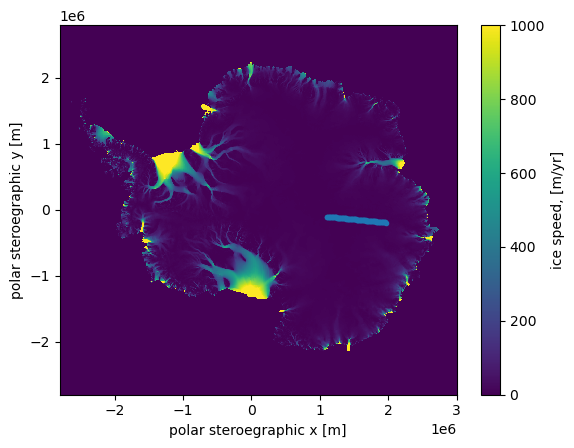

In [19]:
%matplotlib inline
plt.figure()
plt.pcolormesh(x, y, speed, clim = (0, 1000));
plt.plot(x_i, y_i, '.')
plt.xlabel('polar steroegraphic x [m]')
plt.ylabel('polar steroegraphic y [m]');
plt.colorbar(label = 'ice speed, [m/yr]')
plt.show()

In [6]:
speed_interp = scipy.interpolate.RegularGridInterpolator((y, x), speed)

In [53]:
speed_interp((y_i, x_i))

array([3.01197328, 2.99727257, 2.96578257, 3.33717963, 3.29067991,
       3.20462534, 2.90794817, 2.55832042, 2.23591257, 1.44047296,
       1.04159117, 0.8530199 , 0.58249683, 0.48924003, 0.51785923,
       0.51782885, 0.50534978, 0.5182475 , 0.50011113, 0.53542719,
       0.73248019, 0.9522671 , 1.22677179, 1.30395917, 1.01110337,
       1.04505168, 1.13126713, 1.17088745, 1.00939128, 0.77366499,
       1.00423493, 1.17596931, 1.32628831, 1.5459173 , 2.25755825,
       2.60940797, 2.87016691, 2.960476  , 2.91490539, 2.95994871,
       3.23068498, 3.32979754, 3.71720141, 3.97903282, 3.29175645,
       3.61358185, 4.16982776, 3.75356504, 3.90075584, 4.25327048,
       3.28895809, 2.59846018, 2.78592414, 2.56855959, 2.08420605,
       2.04390835, 2.12301594, 2.46930483, 2.22355789, 1.85609601,
       1.87944785, 2.13470647, 2.54769835, 2.48122978, 2.37002677,
       2.35729937, 2.27305788, 2.26526453, 2.47746596, 2.48034493,
       2.54716859, 2.73345119, 2.77027584, 2.53711548, 2.40781

In [61]:
d = np.sqrt(np.diff(y_i)**2 + np.diff(x_i)**2)
d = np.insert(np.cumsum(d), 0 , 0)

In [9]:
d = np.linspace(0, np.sqrt((x[-1]-x[0])**2 + (y[-1]-y[0])**2), 100)

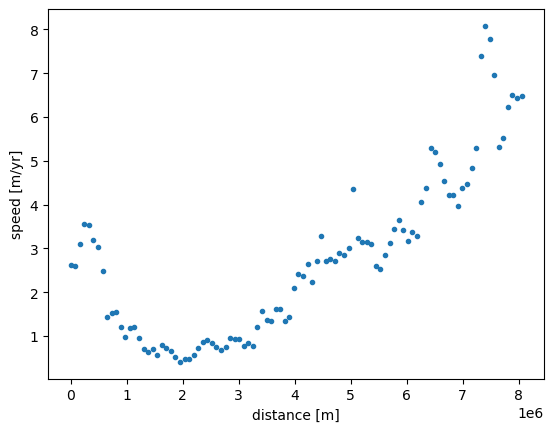

In [10]:
plt.figure()
plt.plot(d, speed_interp((y_i, x_i)), '.')
plt.xlabel('distance [m]')
plt.ylabel('speed [m/yr]');
plt.show()

In [21]:
def inter_field_and_plot(x, y, field, x_i, y_i):
    interp = scipy.interpolate.RegularGridInterpolator((y, x), field)
    d = np.sqrt(np.diff(y_i)**2 + np.diff(x_i)**2)
    d = np.insert(np.cumsum(d), 0, 0)
    
    plt.figure()
    interpolated_values = interp((y_i, x_i))
    plt.plot(d,interpolated_values)
    plt.xlabel('distance [m]')
    plt.show()
    
    return interpolated_values

In [22]:
interp = scipy.interpolate.RegularGridInterpolator((y_bedmap, x_bedmap), thickness)

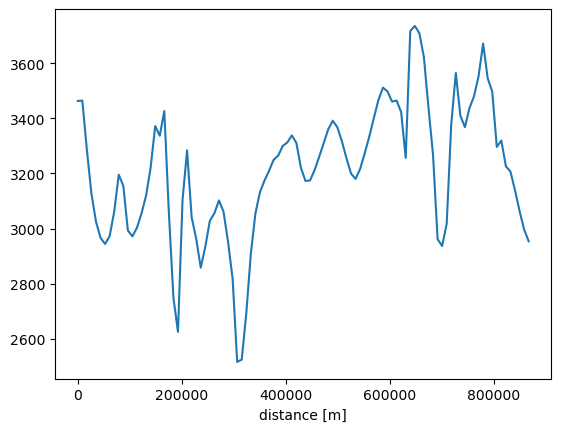

In [23]:
thickness_interpolated = inter_field_and_plot(x_bedmap, y_bedmap, thickness, x_i, y_i)

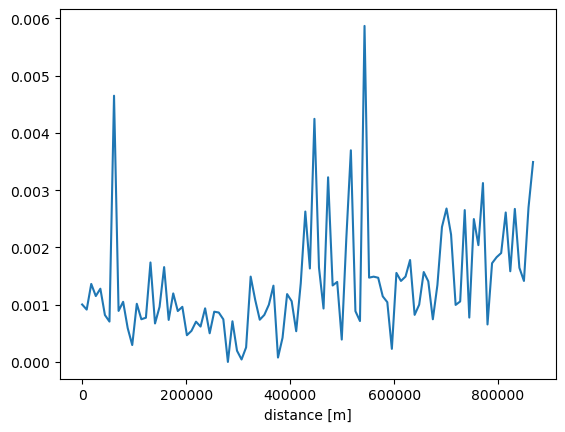

In [24]:
slope_interpolated = inter_field_and_plot(x_bedmap, y_bedmap, slope, x_i, y_i)

In [14]:
def smooth(window_size,arr):
    return np.convolve(np.ones(window_size), arr, mode = 'same')/window_size

In [15]:
slope_smoothed = smooth(20,slope_interpolated)

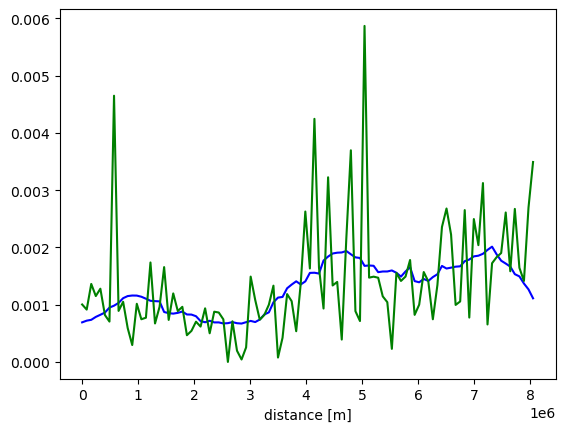

In [16]:
plt.figure()
plt.plot(d,slope_smoothed , 'b')
plt.plot(d,slope_interpolated , 'g')

plt.xlabel('distance [m]')
plt.show()
    

In [17]:
n = 3                         # Glen's flow law exponent
A = 24e-25 *(365*24*60*60);    # Glen's flow law parameter original value from Cuffey and Paterson 24e-25
rho = 917                      # ice density
g = 9.8                        # acceleration due to gravity

u = 2*A/(n+1)*(rho*g*slope_smoothed*thickness_interpolated)**n * thickness_interpolated;

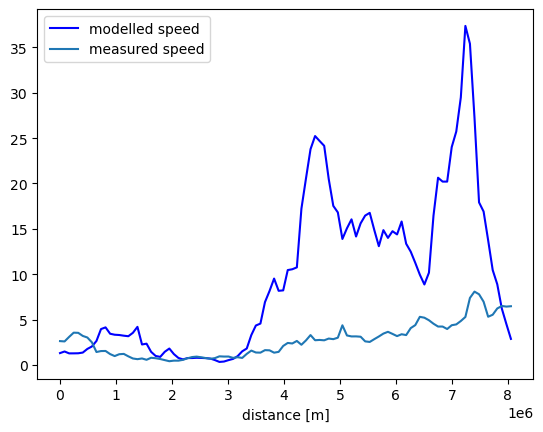

In [20]:
plt.figure()
plt.plot(d, u , 'b', label = 'modelled speed')
plt.plot(d, speed_interp((y_i, x_i)), label = 'measured speed')
plt.xlabel('distance [m]')
plt.legend()
plt.show()